# Exploring Cancer Incidence Data from CDC Wonder
Author: Pranshu Gupta

## Importing Packages

In [37]:
import os
import glob
import csv
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Preparing Data

In [38]:
directory = 'dataset/'
files = glob.glob(os.path.join(directory, '*.txt'))

print("Number of files: " + str(len(files)))

combinedRows = []

rowTitles = []
for file in files:
    with open(file, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        rowCount = 0
        for row in reader:
            if row[0] == "---":
                break
            if rowCount > 0:
                combinedRows.append(row)
            else:
                rowTitles = row
            rowCount += 1
    print("Processed file: " + file + ", with " + str(rowCount) + " rows")

combinedRows = [rowTitles] + combinedRows

df = pd.DataFrame(combinedRows[1:], columns=combinedRows[0])
print("Total number of rows: " + str(len(df)))
print(df.head())

df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df.to_csv('dataset/combined.csv', index=False)

Number of files: 21
Processed file: dataset/2002.txt, with 10748 rows
Processed file: dataset/2016.txt, with 12725 rows
Processed file: dataset/2017.txt, with 12604 rows
Processed file: dataset/2003.txt, with 11035 rows
Processed file: dataset/2015.txt, with 12669 rows
Processed file: dataset/2001.txt, with 10612 rows
Processed file: dataset/2014.txt, with 12570 rows
Processed file: dataset/2010.txt, with 12222 rows
Processed file: dataset/2004.txt, with 11270 rows
Processed file: dataset/2005.txt, with 11578 rows
Processed file: dataset/2011.txt, with 12269 rows
Processed file: dataset/2007.txt, with 11801 rows
Processed file: dataset/2013.txt, with 12449 rows
Processed file: dataset/2012.txt, with 12362 rows
Processed file: dataset/2006.txt, with 11706 rows
Processed file: dataset/2008.txt, with 12005 rows
Processed file: dataset/2020.txt, with 12069 rows
Processed file: dataset/2021.txt, with 12298 rows
Processed file: dataset/2009.txt, with 12138 rows
Processed file: dataset/2019.t

## Preliminary Analysis

    Year    Count
0   2001  1176041
1   2002  1190851
2   2003  1198321
3   2004  1218030
4   2005  1253632
5   2006  1288710
6   2007  1329720
7   2008  1349118
8   2009  1364825
9   2010  1359061
10  2011  1392694
11  2012  1381315
12  2013  1410488
13  2014  1434543
14  2015  1476828
15  2016  1499208
16  2017  1521420
17  2018  1551453
18  2019  1596413
19  2020  1427426
20  2021  1539337


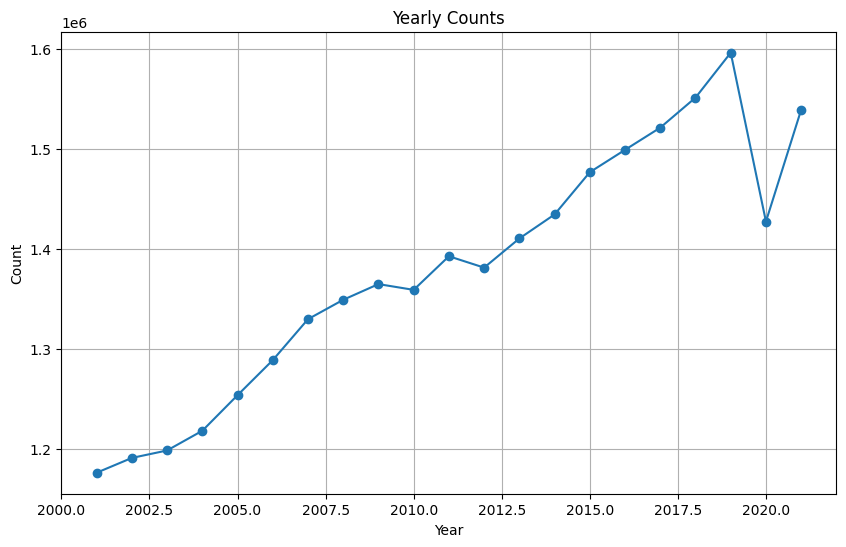

In [39]:
yearly_counts = df.groupby('Year')['Count'].sum().reset_index()
print(yearly_counts)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['Year'], yearly_counts['Count'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts')

# Show the plot
plt.grid(True)
plt.show()